In [1]:
from sklearn import tree
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=read_csv("Travel.csv")

In [2]:
df

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [3]:
features=['Age', 'AnnualIncome', 'FamilyMembers','ChronicDiseases']
X=df[features]
y=df['TravelInsurance']
print(X)
print(y)

      Age  AnnualIncome  FamilyMembers  ChronicDiseases
0      31        400000              6                1
1      31       1250000              7                0
2      34        500000              4                1
3      28        700000              3                1
4      28        700000              8                1
...   ...           ...            ...              ...
1982   33       1500000              4                0
1983   28       1750000              5                1
1984   28       1150000              6                1
1985   34       1000000              6                0
1986   34        500000              4                0

[1987 rows x 4 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64


In [4]:
inputs=df.drop('TravelInsurance',axis='columns')
target=df['TravelInsurance']

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_EmploymentType=LabelEncoder()
le_GraduateOrNot=LabelEncoder()
le_FrequentFlyer=LabelEncoder()
le_EverTravelledAbroad=LabelEncoder()

In [7]:
inputs['EmploymentType_n']=le_EmploymentType.fit_transform(inputs['EmploymentType'])
inputs['GraduateOrNot_n']=le_GraduateOrNot.fit_transform(inputs['GraduateOrNot'])
inputs['FrequentFlyer_n']=le_FrequentFlyer.fit_transform(inputs['FrequentFlyer'])
inputs['EverTravelledAbroad_n']=le_EverTravelledAbroad.fit_transform(inputs['EverTravelledAbroad'])
inputs.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n
0,31,Government Sector,Yes,400000,6,1,No,No,0,1,0,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,1,1,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,1,0,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,1,1,0,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,1,1,1,0


In [8]:
inputs_n=inputs.drop(['EmploymentType','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'],axis='columns')
inputs_n

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n
0,31,400000,6,1,0,1,0,0
1,31,1250000,7,0,1,1,0,0
2,34,500000,4,1,1,1,0,0
3,28,700000,3,1,1,1,0,0
4,28,700000,8,1,1,1,1,0
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1
1983,28,1750000,5,1,1,1,0,1
1984,28,1150000,6,1,1,1,0,0
1985,34,1000000,6,0,1,1,1,1


In [9]:
# Defining the Naive Bayes 


In [10]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(fit_prior=False)

In [11]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
mnb.fit(X_train,y_train)

MultinomialNB(fit_prior=False)

In [12]:
y_pred=mnb.predict(X_test)
print(y_pred)

[0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 1 0 1 1 1 

In [13]:
# Confusion Matrix

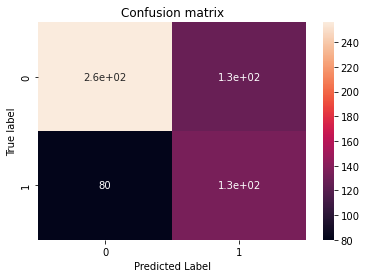

array([[256, 127],
       [ 80, 134]], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_mat =confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat,annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.show()
from sklearn.metrics import confusion_matrix
cm2=np.array(confusion_matrix(y_test,y_pred))
cm2

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6532663316582915

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred =gnb.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 1 

In [17]:
from sklearn import metrics
print(accuracy_score(y_test,y_pred))

0.7738693467336684


In [18]:
from sklearn.metrics import confusion_matrix
cm2=np.array(confusion_matrix(y_test,y_pred))
cm2

array([[346,  37],
       [ 98, 116]], dtype=int64)